In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#%pip install seaborn
#import seaborn as sns
#import pingouin as pg

In [5]:
df = pd.read_csv('stroke')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## EDA ( Exploratory data analysis ) 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [6]:
df.duplicated().sum()

np.int64(0)

In [8]:
FIGSIZE = (6,4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [8]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

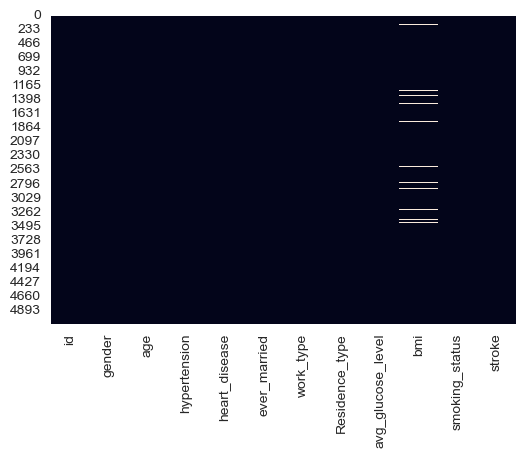

In [9]:
plt.figure(figsize=FIGSIZE)
sns.heatmap(df.isna(),cbar=False)
plt.show()

On constate environs 4% de valeurs nulles dans la colonne BMI, nous pourrons soit les supprimer, soit les imputer. 

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5110.0,NaN,NaN,NaN,43.226614,22.612647,0.08,25.0,45.0,61.0,82.0
hypertension,5110.0,NaN,NaN,NaN,0.097456,0.296607,0.0,0.0,0.0,0.0,1.0
heart_disease,5110.0,NaN,NaN,NaN,0.054012,0.226063,0.0,0.0,0.0,0.0,1.0
ever_married,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5110.0,NaN,NaN,NaN,106.147677,45.28356,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,NaN,NaN,NaN,28.893237,7.854067,10.3,23.5,28.1,33.1,97.6
smoking_status,5110,4,never smoked,1892,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.groupby(by=['stroke']).describe()

id                                                                \
         count          mean           std    min      25%      50%      75%   
stroke                                                                         
0       4861.0  36487.236371  21120.133386   67.0  17762.0  36958.0  54497.0   
1        249.0  37115.068273  21993.344872  210.0  17013.0  36706.0  56669.0   

                    age             ... avg_glucose_level             bmi  \
            max   count       mean  ...               75%     max   count   
stroke                              ...                                     
0       72940.0  4861.0  41.971545  ...            112.83  267.76  4700.0   
1       72918.0   249.0  67.728193  ...            196.71  271.74   209.0   

                                                           
             mean       std   min   25%   50%   75%   max  
stroke                                                     
0       28.823064  7.908287  10.3  23.4  28.0  33.1  97.6  
1       30.471292  6.329452  16.9  26.4  29.7  33.7  56.6  

[2 rows x 48 columns]

In [11]:
[display(df[col].value_counts()) for col in df.columns]

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: count, Length: 104, dtype: int64

hypertension
0    4612
1     498
Name: count, dtype: int64

heart_disease
0    4834
1     276
Name: count, dtype: int64

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

avg_glucose_level
93.88     6
73.00     5
72.49     5
91.85     5
91.68     5
         ..
61.98     1
91.01     1
120.03    1
138.51    1
118.41    1
Name: count, Length: 3979, dtype: int64

bmi
28.7    41
28.4    38
27.7    37
27.6    37
26.7    37
        ..
47.9     1
13.0     1
13.9     1
54.1     1
14.9     1
Name: count, Length: 418, dtype: int64

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

stroke
0    4861
1     249
Name: count, dtype: int64

[None, None, None, None, None, None, None, None, None, None, None]

In [12]:
for col in df.columns:

    display(df[col].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: count, Length: 104, dtype: int64

hypertension
0    4612
1     498
Name: count, dtype: int64

heart_disease
0    4834
1     276
Name: count, dtype: int64

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

avg_glucose_level
93.88     6
73.00     5
72.49     5
91.85     5
91.68     5
         ..
61.98     1
91.01     1
120.03    1
138.51    1
118.41    1
Name: count, Length: 3979, dtype: int64

bmi
28.7    41
28.4    38
27.7    37
27.6    37
26.7    37
        ..
47.9     1
13.0     1
13.9     1
54.1     1
14.9     1
Name: count, Length: 418, dtype: int64

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

stroke
0    4861
1     249
Name: count, dtype: int64

In [14]:
cont_feature = df[['age','avg_glucose_level','bmi']]
cat_feature = df.drop(columns=['age','avg_glucose_level','bmi'])

### Analyse Univariée

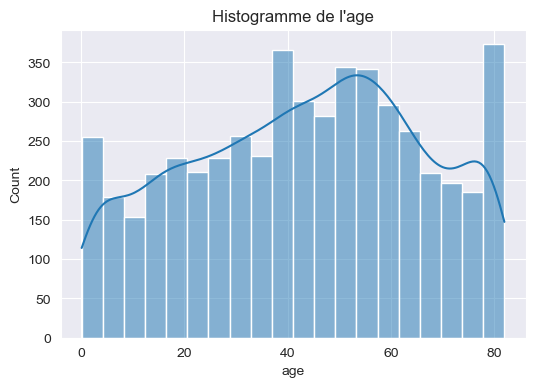

In [15]:
plt.figure(figsize=FIGSIZE)
plt.title('Histogramme de l\'age')
sns.histplot(data=cont_feature,x='age',kde=True)
plt.show()

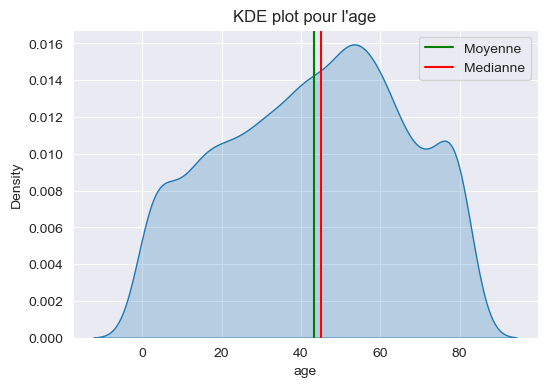

In [16]:
plt.figure(figsize=FIGSIZE)
plt.title('KDE plot pour l\'age')
sns.kdeplot(data=cont_feature,x='age',fill=True)
plt.axvline(x=cont_feature['age'].mean(),c='green',label='Moyenne')
plt.axvline(x=cont_feature['age'].median(),c='red',label='Medianne')
plt.legend()
plt.show()

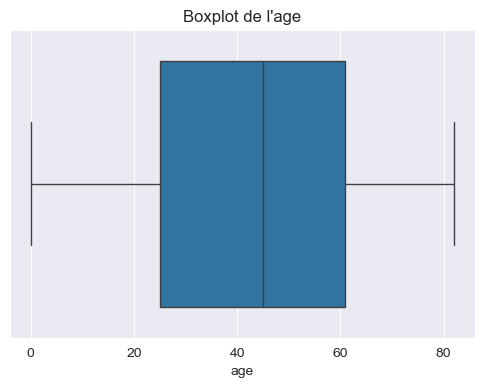

In [17]:
plt.figure(figsize=FIGSIZE)
plt.title("Boxplot de l'age")
sns.boxplot(data=cont_feature,x='age')
plt.show()

moustache supérieur = Q3 + 1.5 * (Q3 - Q1)      ----> (Q3 - Q1) = IQR

moustache inférieur = Q1 - 1.5 * (IQR)

In [17]:
df.shape

(5110, 11)

In [18]:
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3-q1

df[df['bmi']>(q3+1.5*(q3-q1))].sort_values(by=['bmi'])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
38349,Female,49.0,0,0,Yes,Govt_job,Urban,69.92,47.6,never smoked,0
68853,Female,70.0,0,0,Yes,Private,Rural,149.80,47.6,Unknown,0
1696,Female,43.0,0,0,Yes,Private,Urban,100.88,47.6,smokes,0
39601,Female,33.0,0,0,Yes,Private,Urban,69.40,47.8,never smoked,0
52978,Female,30.0,0,0,Yes,Private,Urban,84.92,47.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
37759,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0
545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0


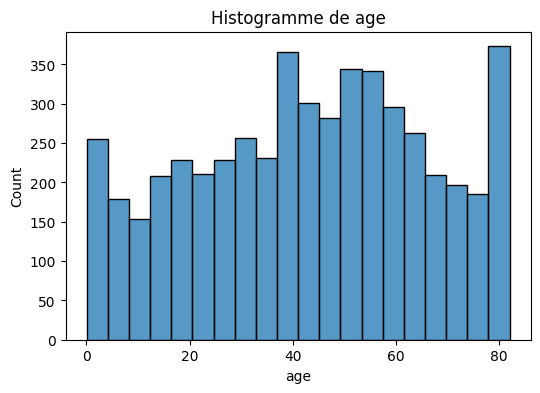

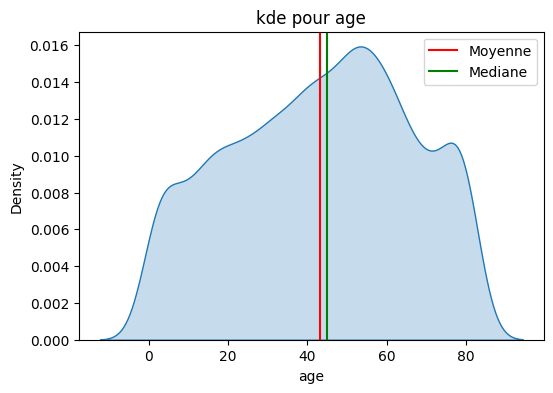

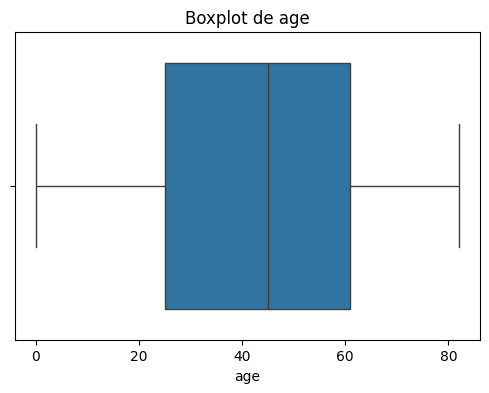

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

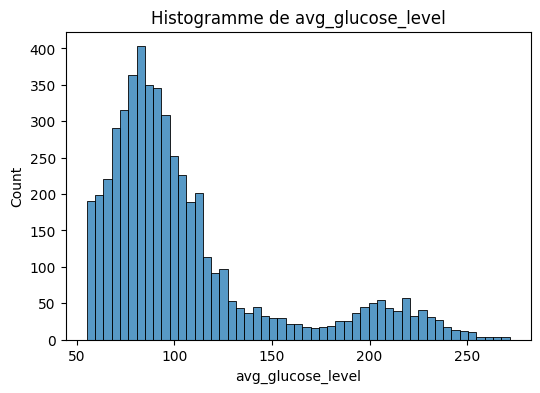

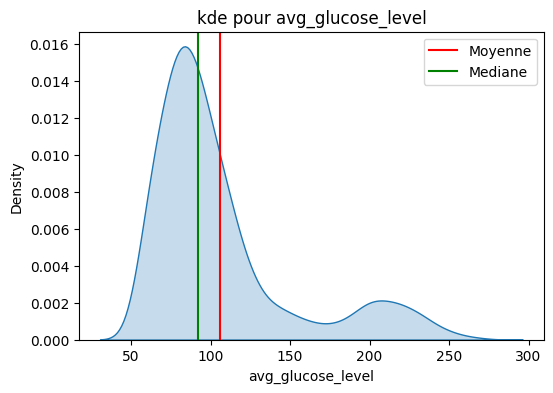

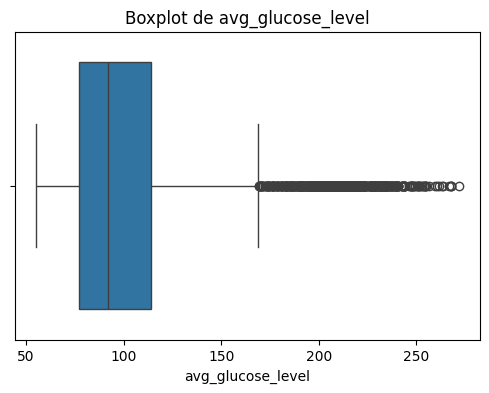

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

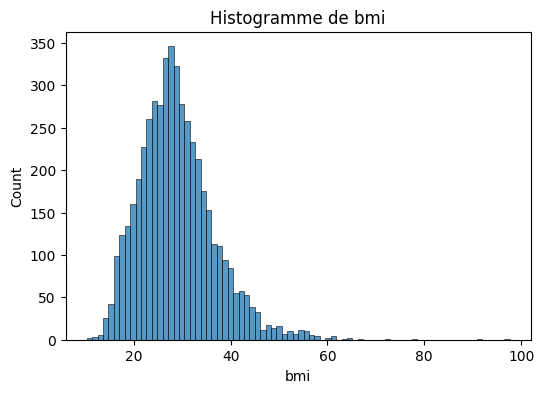

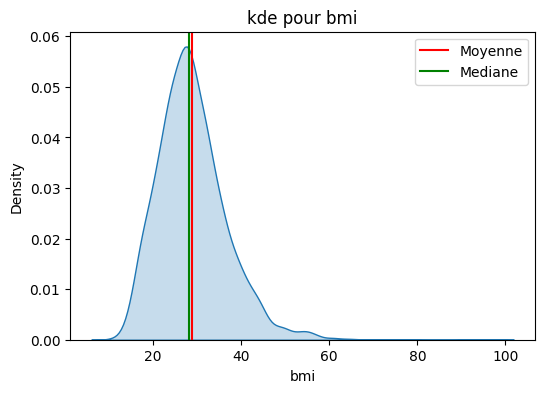

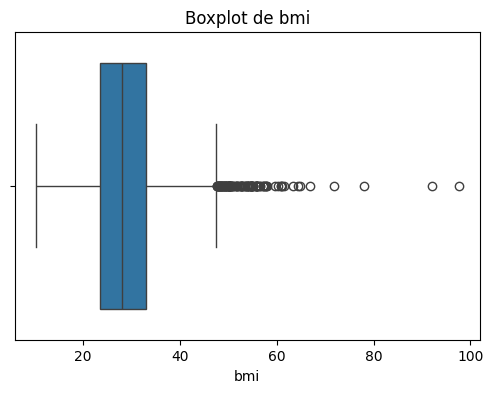

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [19]:
for col in cont_feature.columns:

    plt.figure(figsize=FIGSIZE)
    plt.title(f"Histogramme de {col}")
    sns.histplot(data=cont_feature,x=col)
    plt.show()

    plt.figure(figsize=FIGSIZE)
    plt.title(f"kde pour {col}")
    sns.kdeplot(data=cont_feature,x=col,fill=True)
    plt.axvline(x=cont_feature[col].mean(),c='red',label="Moyenne")
    plt.axvline(x=cont_feature[col].median(),c='green',label='Mediane')
    plt.legend()
    plt.show()

    plt.figure(figsize=FIGSIZE)
    plt.title(f"Boxplot de {col}")
    sns.boxplot(data=cont_feature,x=col)
    plt.show()

    display(df[col].describe())

On constate la présence d'outliers pour le BMI et avg_glucose_level

Transformation potentiel sur le BMI, log : pour recuperer la normalité. 

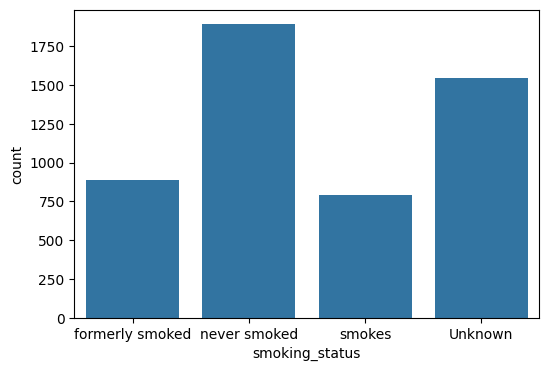

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [20]:
plt.figure(figsize=FIGSIZE)
sns.countplot(data=cat_feature,x='smoking_status')
plt.show()
cat_feature['smoking_status'].value_counts()

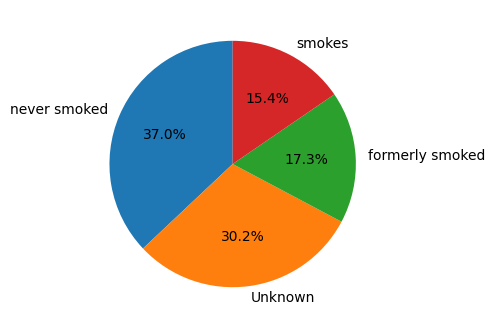

In [21]:
plt.figure(figsize=FIGSIZE)
plt.pie(data=cat_feature,x=cat_feature["smoking_status"].value_counts()
        ,autopct="%1.1f%%"
        ,startangle=90
        ,labels=cat_feature["smoking_status"].value_counts().index)
plt.show()

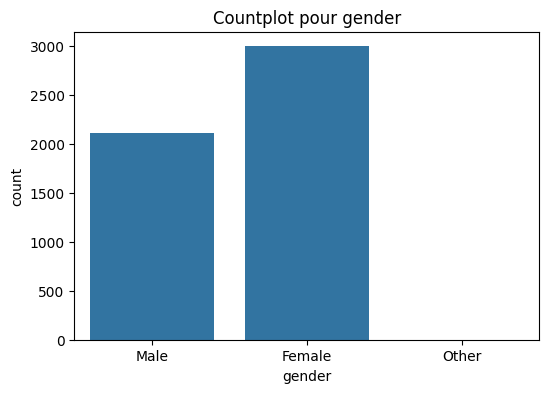

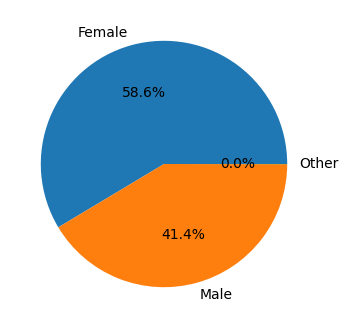

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

gender
Female    0.585910
Male      0.413894
Other     0.000196
Name: proportion, dtype: float64

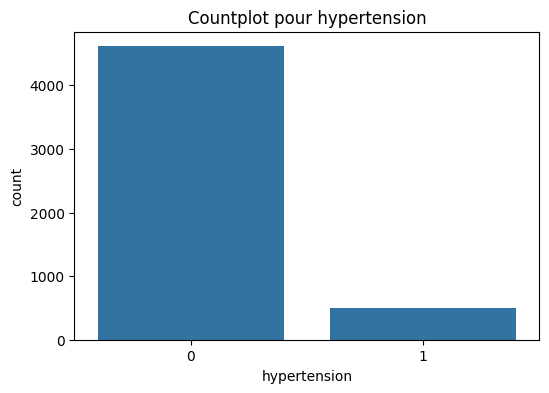

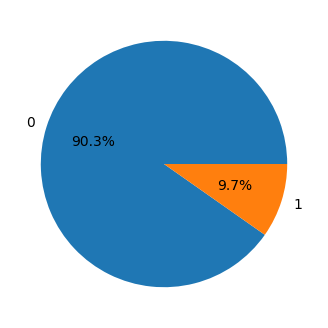

hypertension
0    4612
1     498
Name: count, dtype: int64

hypertension
0    0.902544
1    0.097456
Name: proportion, dtype: float64

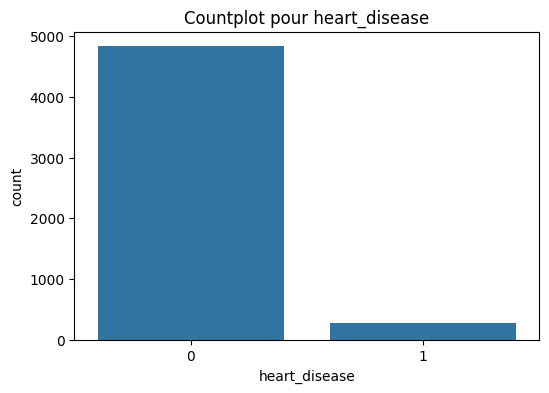

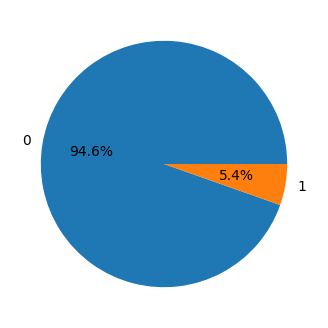

heart_disease
0    4834
1     276
Name: count, dtype: int64

heart_disease
0    0.945988
1    0.054012
Name: proportion, dtype: float64

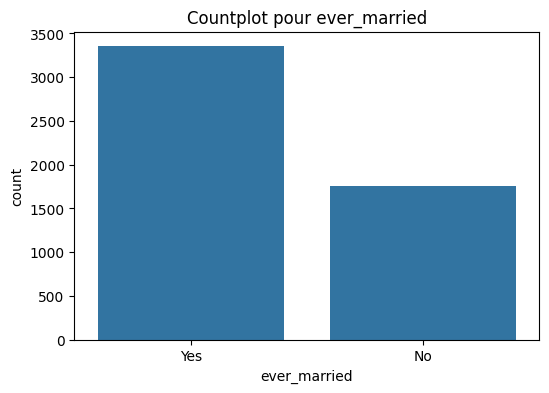

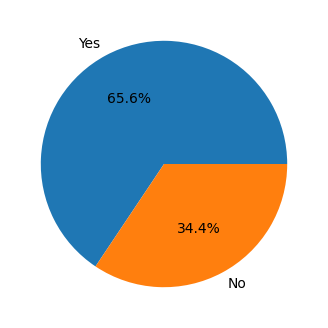

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

ever_married
Yes    0.656164
No     0.343836
Name: proportion, dtype: float64

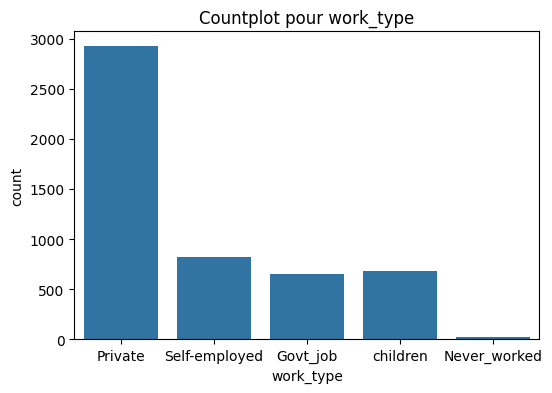

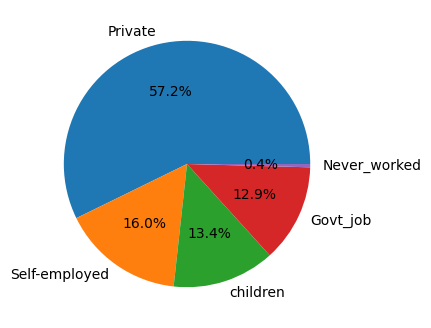

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

work_type
Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
Name: proportion, dtype: float64

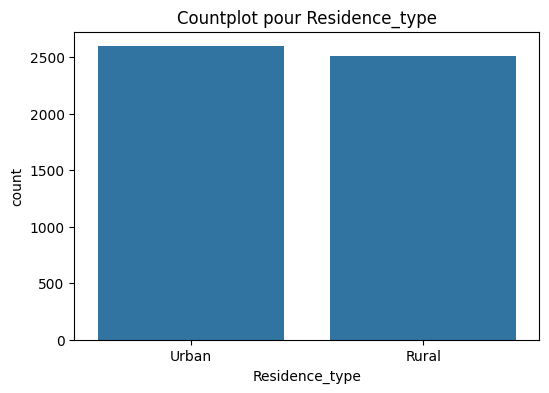

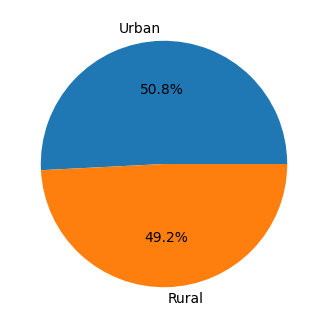

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Residence_type
Urban    0.508023
Rural    0.491977
Name: proportion, dtype: float64

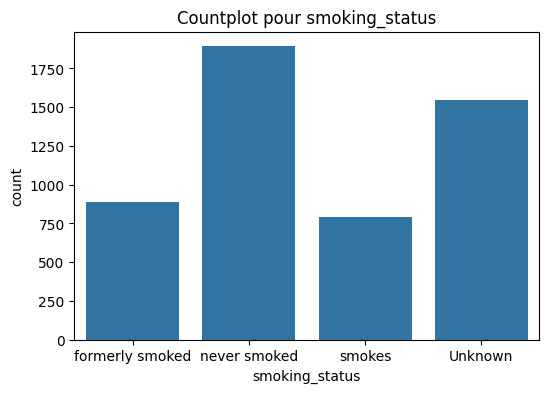

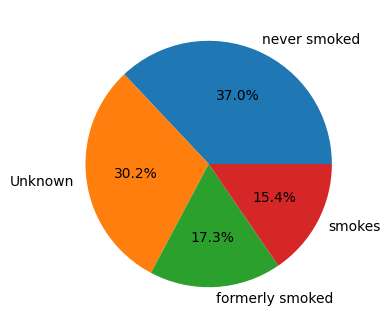

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

smoking_status
never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: proportion, dtype: float64

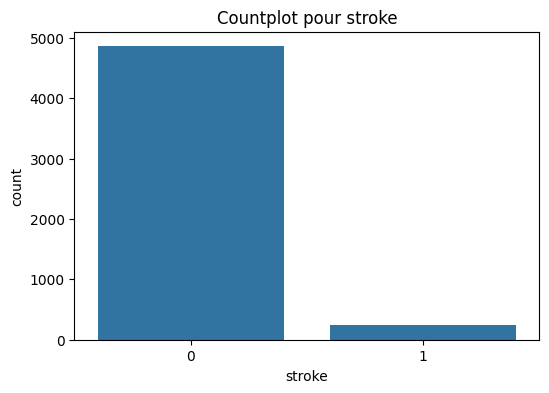

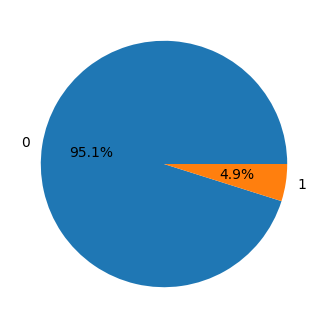

stroke
0    4861
1     249
Name: count, dtype: int64

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

In [22]:
for col in cat_feature :

    plt.figure(figsize=FIGSIZE)
    plt.title(f"Countplot pour {col}")
    sns.countplot(data=cat_feature,x=col)
    plt.show()

    plt.figure(figsize=FIGSIZE)
    plt.pie(data=cat_feature,
            x=cat_feature[col].value_counts(),
            autopct="%1.1f%%",
            labels=cat_feature[col].value_counts().index)
    plt.show()

    display(cat_feature[col].value_counts())
    display(cat_feature[col].value_counts(normalize=True))

Déséquilibre dans la target, il faudra ré-échantilloner 

In [23]:
df.loc[(df['work_type'] == "children")&(df['stroke']==1),'age']

id
69768     1.32
49669    14.00
Name: age, dtype: float64

## Analyse Bivariée (par rapport a la target)

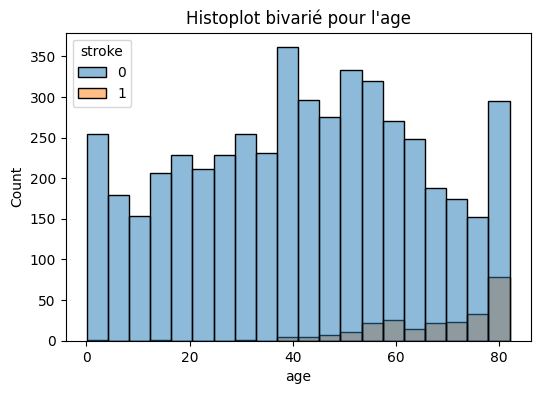

In [24]:
plt.figure(figsize=FIGSIZE)
plt.title('Histoplot bivarié pour l\'age')
sns.histplot(data=cont_feature,x='age',hue=df['stroke'])
plt.show()

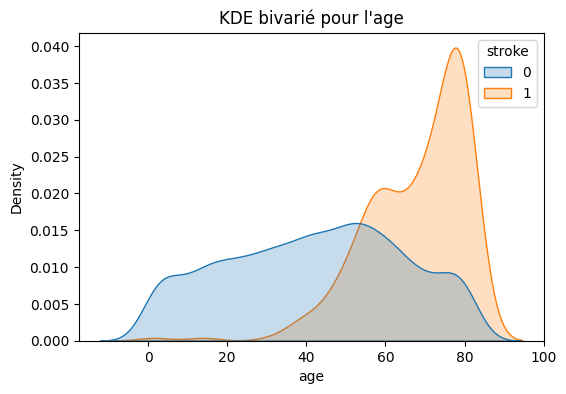

In [25]:
plt.figure(figsize=FIGSIZE)
plt.title('KDE bivarié pour l\'age')
sns.kdeplot(data=cont_feature,x='age',hue=df['stroke'],fill=True,common_norm=False)
plt.show()

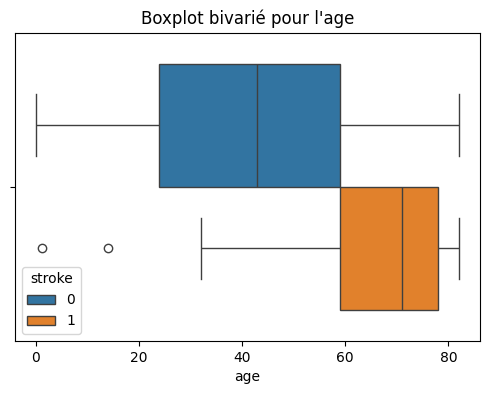

In [26]:
plt.figure(figsize=FIGSIZE)
plt.title("Boxplot bivarié pour l'age")
sns.boxplot(data=cont_feature,x='age',hue=df['stroke'])
plt.show()

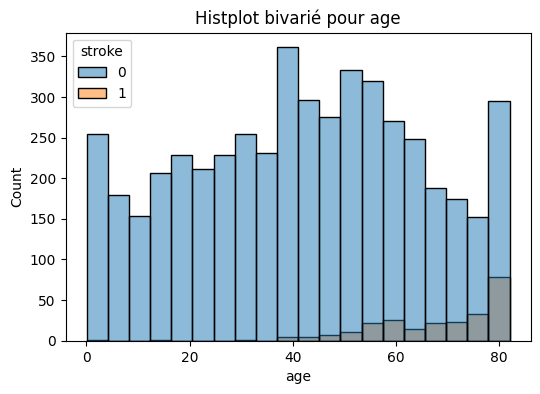

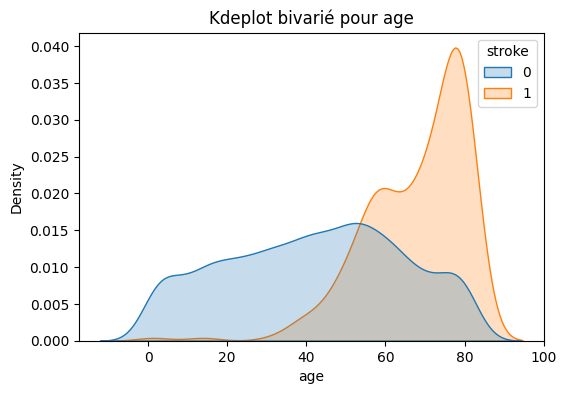

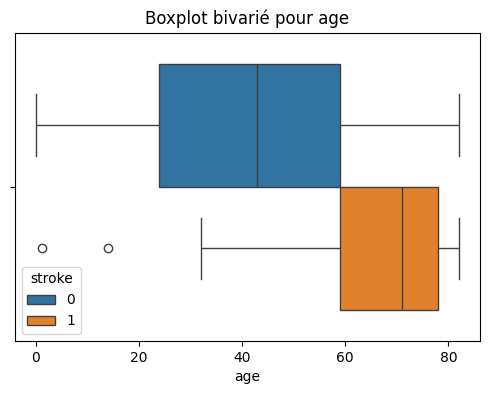

age                                                    
         count       mean        std   min   25%   50%   75%   max
stroke                                                            
0       4861.0  41.971545  22.291940  0.08  24.0  43.0  59.0  82.0
1        249.0  67.728193  12.727419  1.32  59.0  71.0  78.0  82.0

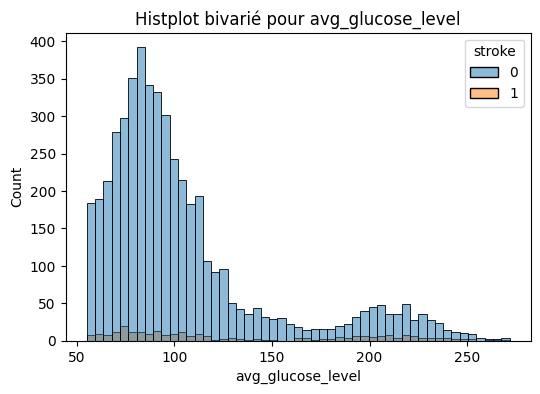

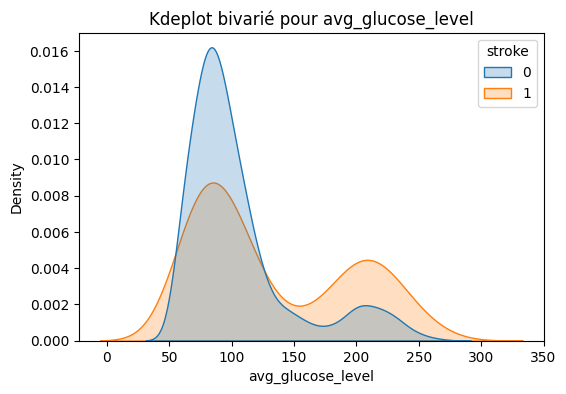

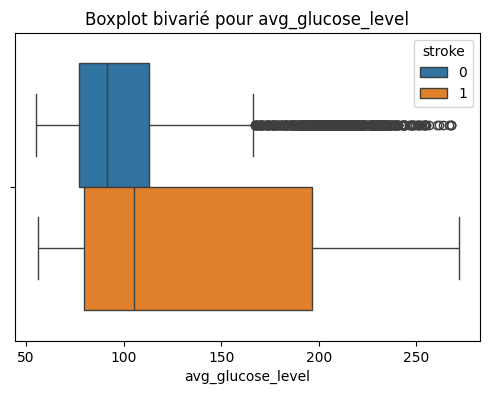

avg_glucose_level                                                       \
                   count        mean        std    min    25%     50%     75%   
stroke                                                                          
0                 4861.0  104.795513  43.846069  55.12  77.12   91.47  112.83   
1                  249.0  132.544739  61.921056  56.11  79.79  105.22  196.71   

                
           max  
stroke          
0       267.76  
1       271.74

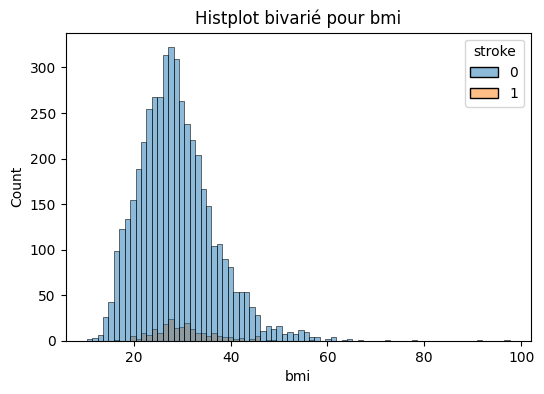

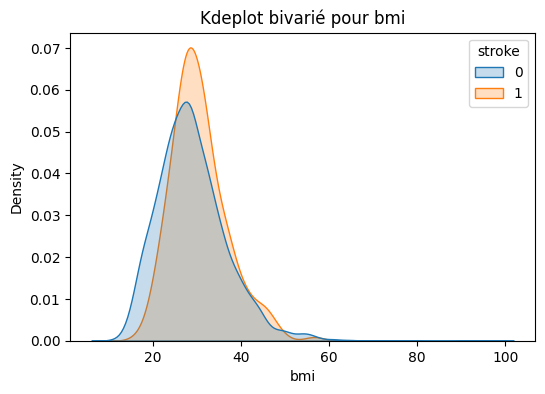

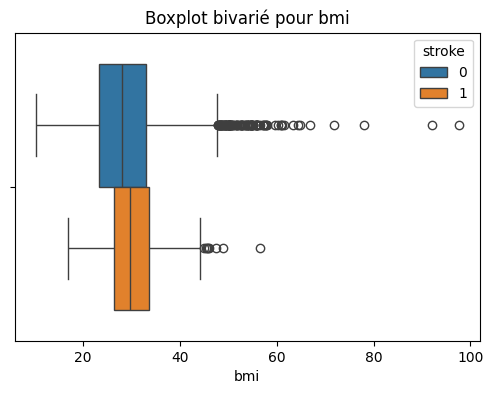

bmi                                                   
         count       mean       std   min   25%   50%   75%   max
stroke                                                           
0       4700.0  28.823064  7.908287  10.3  23.4  28.0  33.1  97.6
1        209.0  30.471292  6.329452  16.9  26.4  29.7  33.7  56.6

In [27]:
for col in cont_feature.columns:

    plt.figure(figsize=FIGSIZE)
    plt.title(f'Histplot bivarié pour {col}')
    sns.histplot(data=cont_feature,x=col,hue=df['stroke'])
    plt.show()

    plt.figure(figsize=FIGSIZE)
    plt.title(f"Kdeplot bivarié pour {col}")
    sns.kdeplot(data=cont_feature,x=col,hue=df['stroke'],common_norm=False,fill=True)
    plt.show()

    plt.figure(figsize=FIGSIZE)
    plt.title(f"Boxplot bivarié pour {col}")
    sns.boxplot(data=cont_feature,x=col,hue=df['stroke'])
    plt.show()

    display(df[['stroke',col]].groupby(by='stroke').describe())

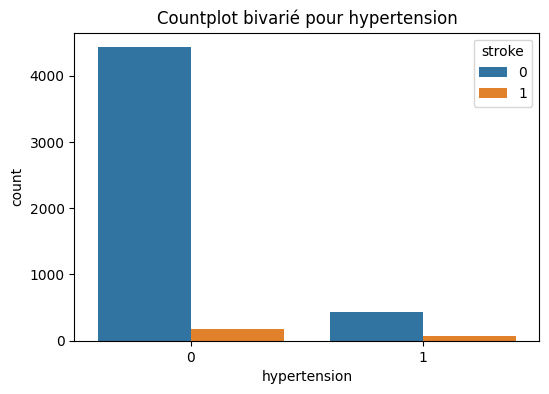

In [28]:
plt.figure(figsize=FIGSIZE)
plt.title(f"Countplot bivarié pour hypertension")
sns.countplot(data=cat_feature,x='hypertension',hue='stroke')
plt.show()

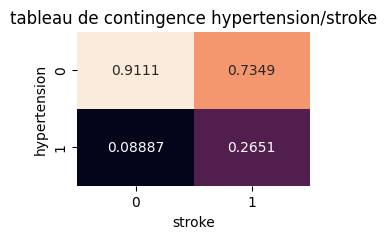

In [29]:
ct = pd.crosstab(cat_feature['hypertension'],cat_feature['stroke'],normalize='columns')
plt.figure(figsize=(3,2))
plt.title("tableau de contingence hypertension/stroke")
sns.heatmap(ct,annot=True,cbar=False,fmt='.4g')
plt.show()

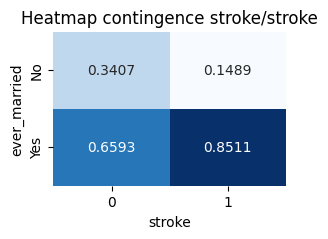

In [38]:
ct = pd.crosstab(df[df['gender']=="Female"]['ever_married'],cat_feature['stroke'],normalize='columns')
plt.figure(figsize=(3,2))
plt.title(f'Heatmap contingence {col}/stroke')
sns.heatmap(ct,annot=True,cbar=False,fmt='.4g',cmap='Blues')
plt.show()

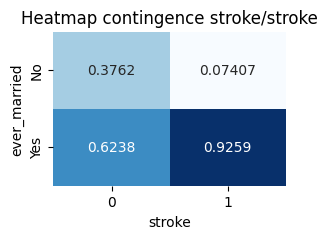

In [39]:
ct = pd.crosstab(df[df['gender']=="Male"]['ever_married'],cat_feature['stroke'],normalize='columns')
plt.figure(figsize=(3,2))
plt.title(f'Heatmap contingence {col}/stroke')
sns.heatmap(ct,annot=True,cbar=False,fmt='.4g',cmap='Blues')
plt.show()

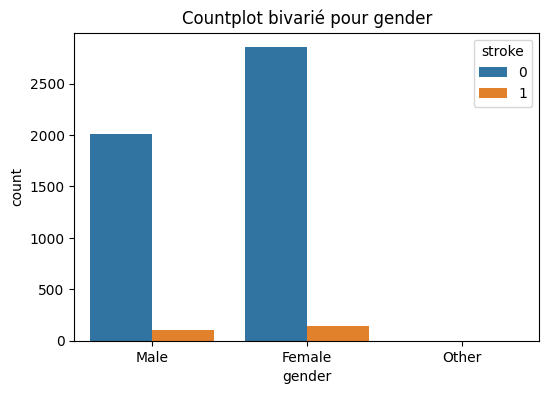

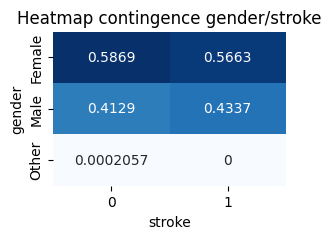

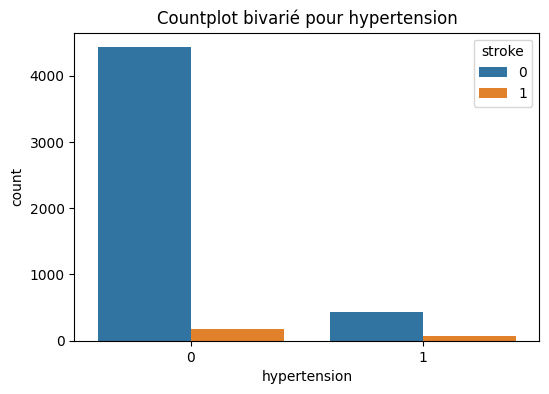

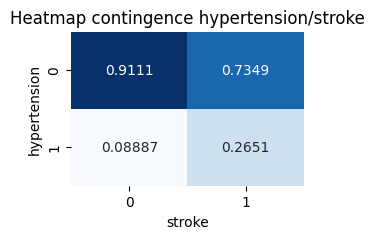

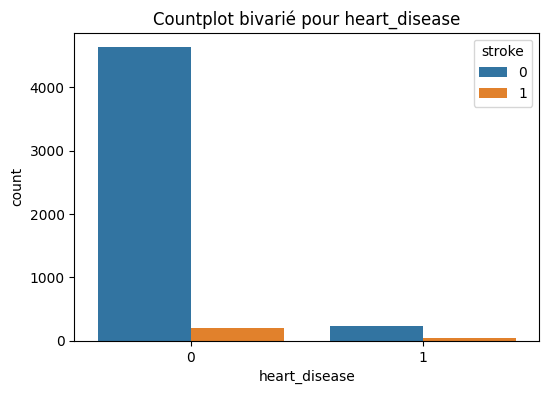

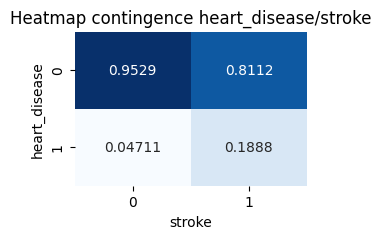

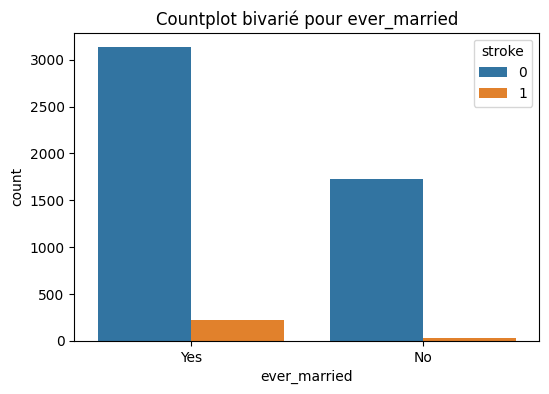

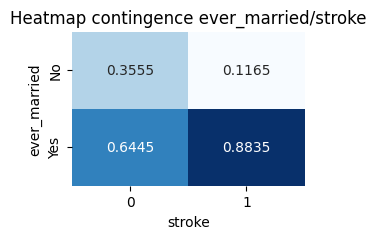

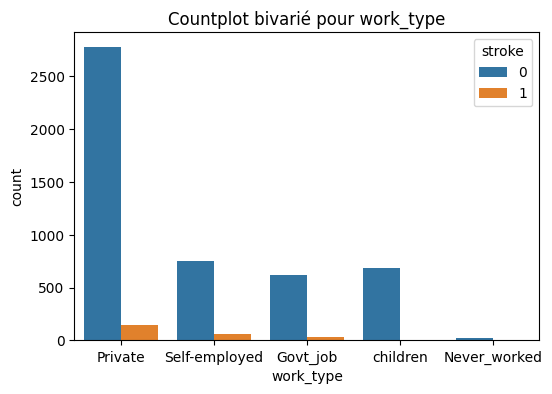

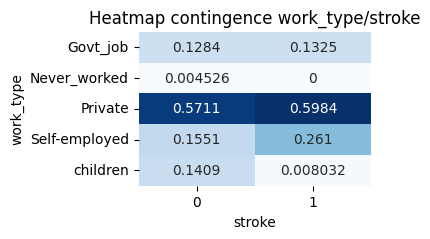

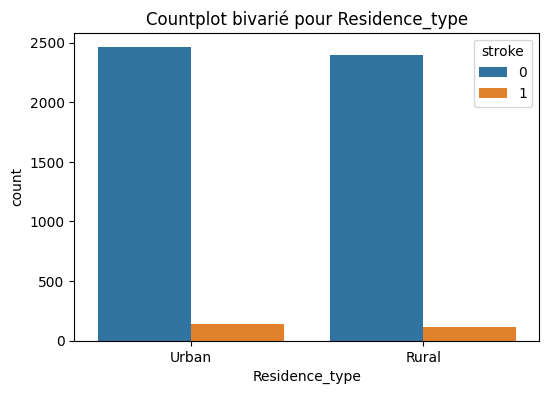

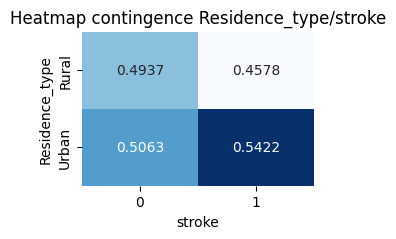

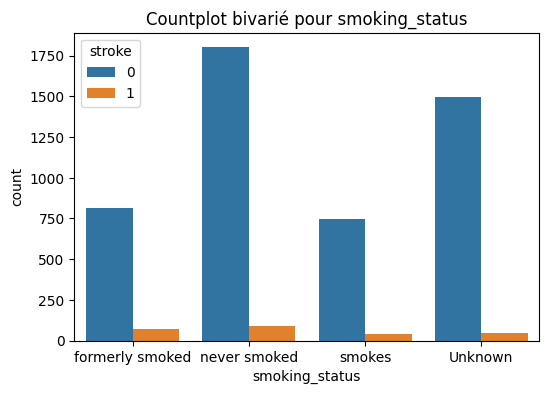

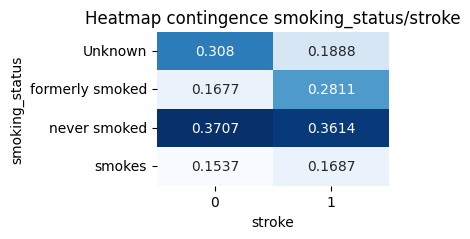

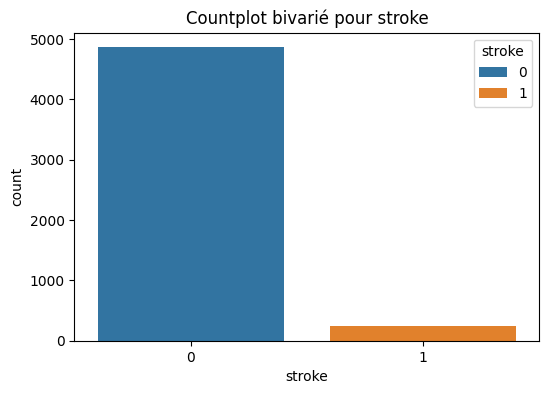

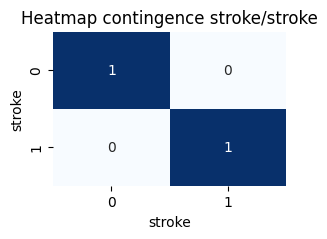

In [30]:
for col in cat_feature.columns:
    
    plt.figure(figsize=FIGSIZE)
    plt.title(f"Countplot bivarié pour {col}")
    sns.countplot(data=cat_feature,x=col,hue='stroke')
    plt.show()

    ct = pd.crosstab(cat_feature[col],cat_feature['stroke'],normalize='columns')
    plt.figure(figsize=(3,2))
    plt.title(f'Heatmap contingence {col}/stroke')
    sns.heatmap(ct,annot=True,cbar=False,fmt='.4g',cmap='Blues')
    plt.show()

## Analyse Multivariée 

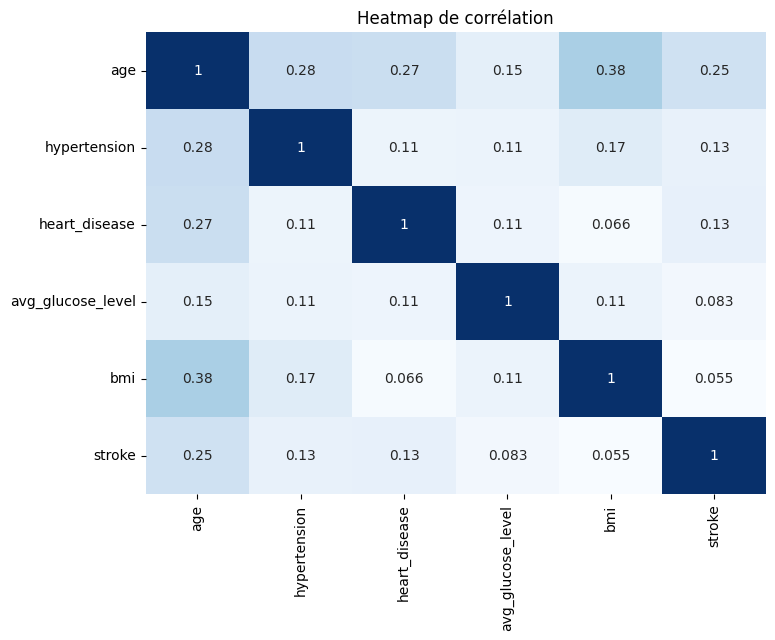

In [31]:
plt.figure(figsize=(8,6))
plt.title("Heatmap de corrélation")
sns.heatmap(df.corr(method='spearman',numeric_only=True),cbar=False,cmap='Blues',annot=True,)
plt.show()

<Figure size 1500x1000 with 0 Axes>

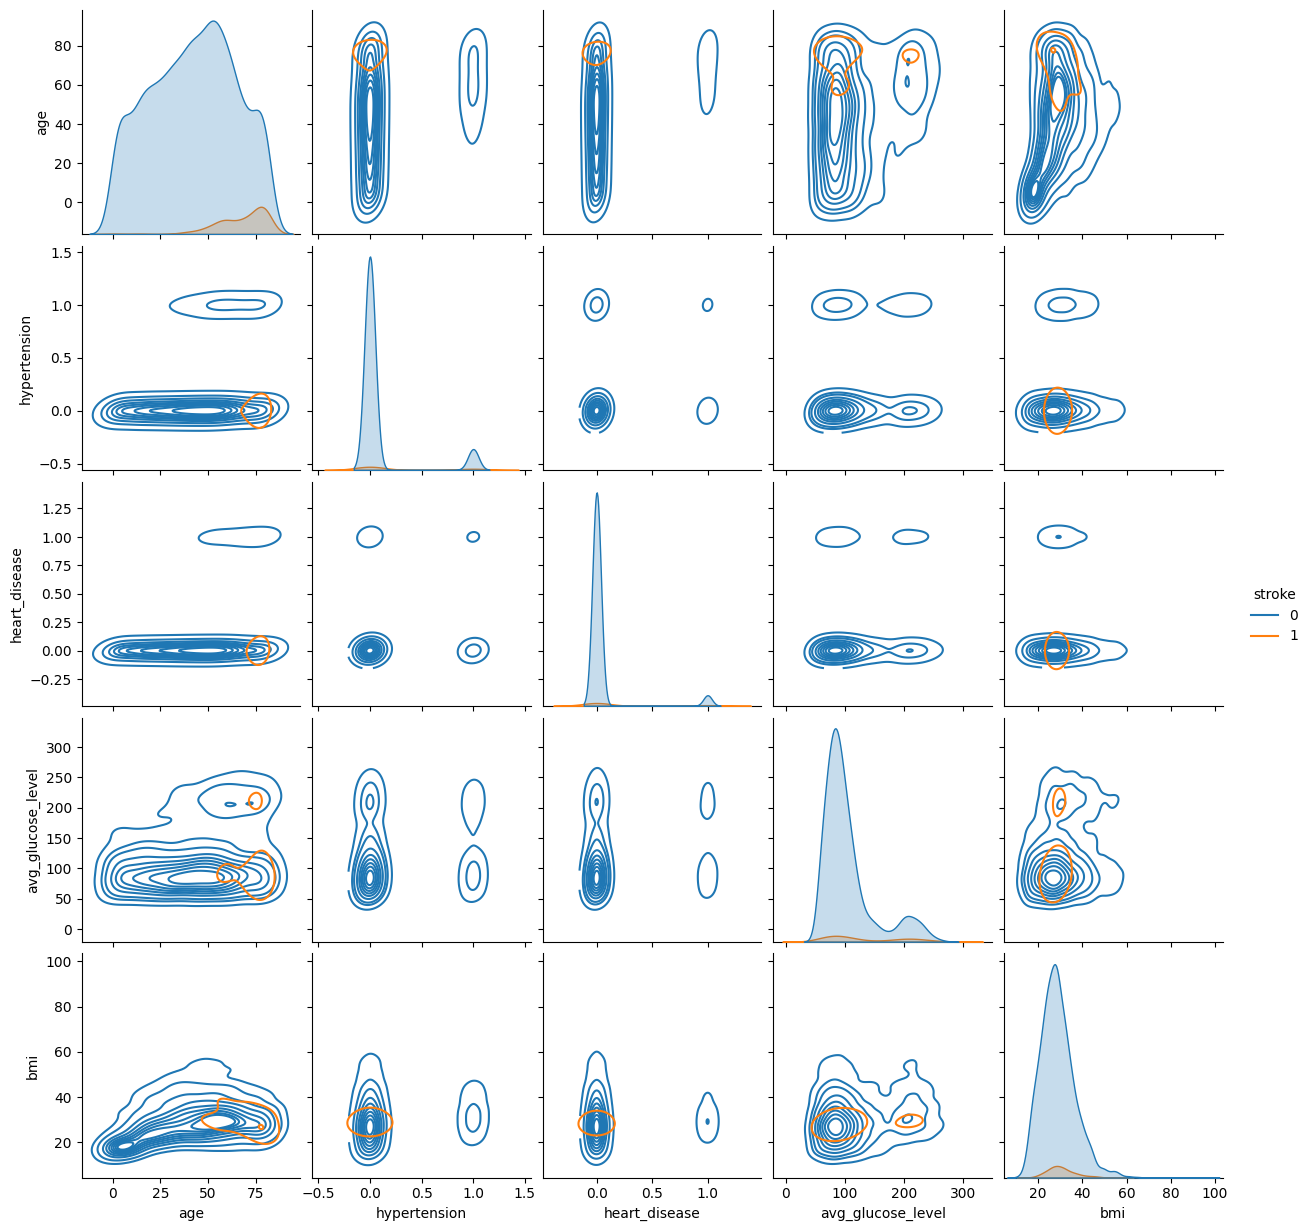

In [32]:
plt.figure(figsize=(15,10))
sns.pairplot(data=df,hue='stroke',kind='kde')
plt.show()

## Tests d'hypothèses 

#### Test de normalité

In [47]:
df.shape

(5110, 11)

In [56]:
for col in cont_feature.columns:
    display(col)
    display(pg.normality(data=df[col],method='shapiro'))
    display(pg.normality(data=df[col],method='normaltest'))

'age'

c:\Users\georg\anaconda3\envs\Condaenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5110.
  res = hypotest_fun_out(*samples, **kwds)


,W,pval,normal
age,0.967243,1.378936e-32,False


,W,pval,normal
age,1120.528644,4.789570e-244,False


'avg_glucose_level'

c:\Users\georg\anaconda3\envs\Condaenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5110.
  res = hypotest_fun_out(*samples, **kwds)


,W,pval,normal
avg_glucose_level,0.805868,1.795389e-61,False


,W,pval,normal
avg_glucose_level,1328.935795,2.662311e-289,False


'bmi'

,W,pval,normal
bmi,0.953547,6.615877e-37,False


,W,pval,normal
bmi,1021.179505,1.793444e-222,False


Hypothese de normalité rejettée, donc on passe directement a un test non paramétrique.  
Si la normalité avait été validée, on aurait pu faire un test d'homoscédasticité. (qui suit a titre d'exemple)

In [62]:
for col in cont_feature.columns:
    display(col)
    display(pg.homoscedasticity(data=df.dropna(),dv=col,group='stroke'))

'age'

,W,pval,equal_var
levene,107.004686,7.977819e-25,False


'avg_glucose_level'

,W,pval,equal_var
levene,94.860596,3.242865e-22,False


'bmi'

,W,pval,equal_var
levene,10.424906,0.001251,False


Si l'hypothèse d'homoscédasticité est validée : -> Test ANOVA.  
Si l'hypothèse d'homoscédasticité est rejetée : -> Test Welch-ANOVA

Ici nous allons utiliser un test non paramétrique car l'hypothèse de normalité a été rejetée. -> Test U de Mann-Whitney

In [ ]:

pg.mwu(x=df.loc[df['stroke']==1,'age'],y=df.loc[df['stroke']==0,'age'])

,U-val,alternative,p-val,RBC,CLES
MWU,1010125.5,two-sided,3.726635e-71,-0.669092,0.834546


Rejet de l'hypothèse d'indépendance, RBC proche de -1 -> Forte corrélation.  
CLES proche de 1, grande taille d'effet -> Effet significatif.

In [ ]:
for col in cont_feature.columns:
    display(col)
    display(pg.mwu(x=df.loc[df['stroke']==1,col]
                   ,y=df.loc[df['stroke']==0,col]))

'age'

,U-val,alternative,p-val,RBC,CLES
MWU,1010125.5,two-sided,3.726635e-71,-0.669092,0.834546


'avg_glucose_level'

,U-val,alternative,p-val,RBC,CLES
MWU,739150.0,two-sided,3.640367e-09,-0.221343,0.610671


'bmi'

,U-val,alternative,p-val,RBC,CLES
MWU,569021.5,two-sided,0.000103,-0.158549,0.579275


Toutes mes features continues sont liée a ma target. L'age étant la variable a plus discriminante suivi de avg_glucose_level et le bmi est légérement correlé.

### Test pour les variables catégorielle

In [96]:
for col in cat_feature.columns:
    if col =='gender':
        data = df[df['gender'] != 'Other']
        chi2 = pg.chi2_independence(data=data,x=col,y='stroke')
        display(chi2[0])
        display(chi2[1])
        display(chi2[2])

    elif col == 'work_type':
        data = df[df['work_type'] != 'Never_worked']
        chi2 = pg.chi2_independence(data=data,x=col,y='stroke')
        display(chi2[0])
        display(chi2[1])
        display(chi2[2])
    elif col == 'stroke':
        pass
    else:
        chi2 = pg.chi2_independence(data=df,x=col,y='stroke')
        display(chi2[0])
        display(chi2[1])
        display(chi2[2])
        

stroke,0,1
gender,,
Female,2848.079859,145.920141
Male,2011.920141,103.079859


stroke,0,1
gender,,
Female,2852.5,141.5
Male,2007.5,107.5


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,0.340003,1.0,0.559828,0.008158,0.089771
1,cressie-read,0.666667,0.339569,1.0,0.560078,0.008153,0.089719
2,log-likelihood,0.000000,0.338726,1.0,0.560565,0.008142,0.089619
3,freeman-tukey,-0.500000,0.338117,1.0,0.560918,0.008135,0.089546
4,mod-log-likelihood,-1.000000,0.337527,1.0,0.561260,0.008128,0.089476
5,neyman,-2.000000,0.336402,1.0,0.561913,0.008114,0.089342


stroke,0,1
hypertension,,
0,4387.266536,224.733464
1,473.733464,24.266536


stroke,0,1
hypertension,,
0,4428.5,183.5
1,432.5,65.5


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,81.605368,1.0,1.661622e-19,0.126371,1.000000
1,cressie-read,0.666667,72.922988,1.0,1.348088e-17,0.119460,1.000000
2,log-likelihood,0.000000,59.769802,1.0,1.066269e-14,0.108151,1.000000
3,freeman-tukey,-0.500000,52.612863,1.0,4.062199e-13,0.101469,1.000000
4,mod-log-likelihood,-1.000000,47.113056,1.0,6.700785e-12,0.096020,1.000000
5,neyman,-2.000000,39.537634,1.0,3.217978e-10,0.087962,0.999992


stroke,0,1
heart_disease,,
0,4598.448924,235.551076
1,262.551076,13.448924


stroke,0,1
heart_disease,,
0,4631.5,202.5
1,229.5,46.5


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,90.259561,1.0,2.088785e-21,0.132903,1.000000
1,cressie-read,0.666667,77.193504,1.0,1.550025e-18,0.122908,1.000000
2,log-likelihood,0.000000,58.724436,1.0,1.813748e-14,0.107201,1.000000
3,freeman-tukey,-0.500000,49.412060,1.0,2.074663e-12,0.098335,1.000000
4,mod-log-likelihood,-1.000000,42.639610,1.0,6.581308e-11,0.091347,0.999998
5,neyman,-2.000000,33.882000,1.0,5.855798e-09,0.081428,0.999944


stroke,0,1
ever_married,,
No,1671.384932,85.615068
Yes,3189.615068,163.384932


stroke,0,1
ever_married,,
No,1727.5,29.5
Yes,3133.5,219.5


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,58.923890,1.0,1.638902e-14,0.107383,1.0
1,cressie-read,0.666667,61.812674,1.0,3.777352e-15,0.109984,1.0
2,log-likelihood,0.000000,69.605351,1.0,7.244010e-17,0.116711,1.0
3,freeman-tukey,-0.500000,77.800567,1.0,1.139875e-18,0.123390,1.0
4,mod-log-likelihood,-1.000000,88.805989,1.0,4.354954e-21,0.131829,1.0
5,neyman,-2.000000,123.915917,1.0,8.789018e-29,0.155723,1.0


c:\Users\georg\anaconda3\envs\Condaenv\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")


stroke,0,1
work_type,,
Govt_job,624.847288,32.152712
Private,2781.854363,143.145637
Self-employed,778.919222,40.080778
children,653.379127,33.620873


stroke,0,1
work_type,,
Govt_job,624,33
Private,2776,149
Self-employed,754,65
children,685,2


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,47.835515,3.0,2.308209e-10,0.096962,0.999993
1,cressie-read,0.666667,52.086279,3.0,2.870914e-11,0.101178,0.999998
2,log-likelihood,0.000000,67.552970,3.0,1.425979e-14,0.115226,1.000000
3,freeman-tukey,-0.500000,91.447291,3.0,1.070711e-19,0.134064,1.000000
4,mod-log-likelihood,-1.000000,140.161393,3.0,3.488676e-30,0.165974,1.000000
5,neyman,-2.000000,512.041659,3.0,1.172209e-110,0.317234,1.000000


stroke,0,1
Residence_type,,
Rural,2391.497847,122.502153
Urban,2469.502153,126.497847


stroke,0,1
Residence_type,,
Rural,2399.5,114.5
Urban,2461.5,134.5


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,1.081637,1.0,0.298332,0.014549,0.180150
1,cressie-read,0.666667,1.082030,1.0,0.298244,0.014552,0.180199
2,log-likelihood,0.000000,1.083055,1.0,0.298015,0.014558,0.180326
3,freeman-tukey,-0.500000,1.084032,1.0,0.297797,0.014565,0.180446
4,mod-log-likelihood,-1.000000,1.085190,1.0,0.297539,0.014573,0.180589
5,neyman,-2.000000,1.088046,1.0,0.296904,0.014592,0.180942


stroke,0,1
smoking_status,,
Unknown,1468.763992,75.236008
formerly smoked,841.875734,43.124266
never smoked,1799.806654,92.193346
smokes,750.553620,38.446380


stroke,0,1
smoking_status,,
Unknown,1497,47
formerly smoked,815,70
never smoked,1802,90
smokes,747,42


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,29.147269,3.0,0.000002,0.075525,0.997878
1,cressie-read,0.666667,28.684221,3.0,0.000003,0.074922,0.997580
2,log-likelihood,0.000000,28.110054,3.0,0.000003,0.074169,0.997155
3,freeman-tukey,-0.500000,27.975266,3.0,0.000004,0.073991,0.997045
4,mod-log-likelihood,-1.000000,28.089023,3.0,0.000003,0.074141,0.997138
5,neyman,-2.000000,29.074424,3.0,0.000002,0.075430,0.997834


Lecture du résultat chi2 : si pval < 0.05  --> Rejet de l'hypothese H0 (indépendance des features). Les deux variables sont donc dépendante.  

V de Cramer = Taille de l'effet, si proche de 1 effet tres fort.  